# Numerical Methods Project
### Project Description:

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

The information given is as follows:

Features:

- DateCrawled — date profile was downloaded from the database
- VehicleType — vehicle body type
- RegistrationYear — vehicle registration year
- Gearbox — gearbox type
- Power — power (hp)
- Model — vehicle model
- Mileage — mileage (measured in km due to dataset's regional specifics)
- RegistrationMonth — vehicle registration month
- FuelType — fuel type
- Brand — vehicle brand
- NotRepaired — vehicle repaired or not
- DateCreated — date of profile creation
- NumberOfPictures — number of vehicle pictures
- PostalCode — postal code of profile owner (user)
- LastSeen — date of the last activity of the user

Target:

- Price — price (Euro)

#### Importing Python libraries

In [1]:
!pip install -q --upgrade pandas

In [2]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 23.2 MB 135 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 82 kB 256 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings
from scipy import stats as st
from pprint import pprint
warnings.filterwarnings("ignore")
import time
import math

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer


# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb



# Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

<a id="contents"></a>
# Table of contents

- [Step 1](#step1) Data loading and preprocessing
- [Step 2](#step2) Model training
- [Step 3](#step3) Model analysis

<a id="step1"></a>
## Step 1. Data loading and preprocessing

[back to table of contents](#contents)

### Download and study the data

In [2]:
# Downloading the file and saving it as a datafarme

try:
    car_data     = pd.read_csv('/datasets/car_data.csv')
except:
    car_data     = pd.read_csv('car_data.csv' , encoding = "ISO-8859-1")

In [3]:
car_data.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
23622,14/03/2016 11:48,14990,coupe,2009,manual,170,a5,150000,11,gasoline,audi,no,14/03/2016 00:00,0,86971,07/04/2016 14:56
259282,07/03/2016 11:48,3499,bus,2007,auto,109,c4,150000,9,gasoline,citroen,no,07/03/2016 00:00,0,63579,11/03/2016 14:17
148717,25/03/2016 23:52,13700,wagon,2011,manual,160,astra,80000,7,gasoline,opel,no,25/03/2016 00:00,0,92693,01/04/2016 18:47
88693,16/03/2016 11:47,8900,convertible,2005,manual,150,3er,150000,12,petrol,bmw,no,16/03/2016 00:00,0,14478,06/04/2016 04:45
73034,22/03/2016 14:55,1300,bus,1997,manual,68,transporter,150000,4,gasoline,volkswagen,yes,22/03/2016 00:00,0,22453,06/04/2016 04:16


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
car_data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
car_data['DateCreated'].agg(['min','max'])

min    01/02/2016 00:00
max    31/03/2016 00:00
Name: DateCreated, dtype: object

In [7]:
(car_data.isna().sum()/car_data.count()).round(4).sort_values(ascending=False)

NotRepaired          0.2512
VehicleType          0.1183
FuelType             0.1023
Gearbox              0.0593
Model                0.0589
DateCrawled          0.0000
Price                0.0000
RegistrationYear     0.0000
Power                0.0000
Mileage              0.0000
RegistrationMonth    0.0000
Brand                0.0000
DateCreated          0.0000
NumberOfPictures     0.0000
PostalCode           0.0000
LastSeen             0.0000
dtype: float64

#### How are the categorical features distributed?

In [8]:
# How NotRepaired feature values' distributed
car_data['NotRepaired'].value_counts()

no     247161
yes     36054
Name: NotRepaired, dtype: int64

In [9]:
# How VehicleType feature values' distributed
car_data['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [10]:
# How FuelType feature values' distributed
car_data['FuelType'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [11]:
# How Gearbox feature values' distributed
car_data['Gearbox'].value_counts()

manual    268251
auto       66285
Name: Gearbox, dtype: int64

In [12]:
# How NumberOfPictures feature values' distributed
car_data['NumberOfPictures'].value_counts()

0    354369
Name: NumberOfPictures, dtype: int64

In [13]:
# How many unique values Model feature have
car_data['Model'].nunique()

250

In [14]:
# How many unique values Brand feature have
car_data['Brand'].nunique()

40

#### How are the numerical features distributed? are there any outliers?

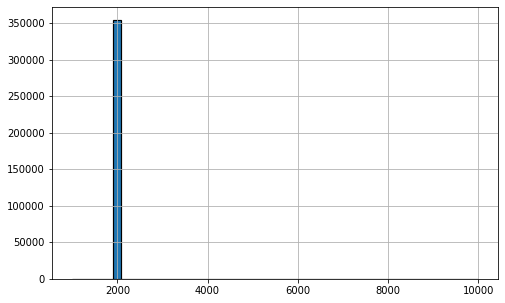

In [15]:
#
car_data['RegistrationYear'].hist(edgecolor='black', linewidth=1.2, figsize=(8,5), bins=50);

The historam shows there are outliers. but since their rate is very small, they are actually not seen in the graph.

I will have to find them by other way then visualization.

Same with power outliers

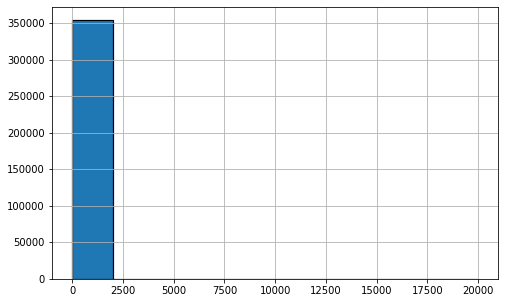

In [16]:
car_data['Power'].hist(edgecolor='black', linewidth=1.2, figsize=(8,5));

In [17]:
len(car_data.query('RegistrationYear < 1960 or RegistrationYear > 2018'))

552

There are 552 inspections with registration year too old (before 1960) or in the future... (I added 2017 and 2018 even though its later then 2016)

In [18]:
len(car_data.query('Power > 2000'))

120

There are 120 inspections with power higher then 2,000 hp, which is illogical (in 2021, the strongest cars has no more then 2,000 hp)

In [19]:
car_data['Price'][car_data['Price'] == 0].value_counts()

0    10772
Name: Price, dtype: int64

There are 10,772 inspections with price = 0. since its the target, I will not fill it, but drop these inspections which are 3% of the data

In [20]:
car_data['Power'][car_data['Power'] == 0].value_counts()

0    40225
Name: Power, dtype: int64

There are 40,225 inspections with power = 0. this value can be filled with the feature's mean or median

In [21]:
car_data['RegistrationMonth'][car_data['RegistrationMonth'] == 0].value_counts()

0    37352
Name: RegistrationMonth, dtype: int64

There are 37,352 inspections with registration month = 0. this value can be filled with the feature's median. it can also be left as is, since I assume it does not have much influence on the car's price.

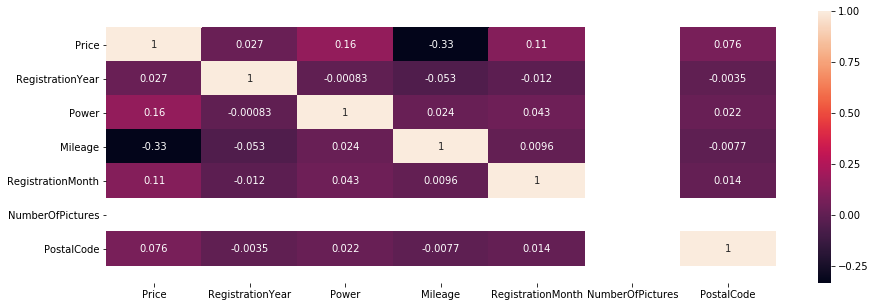

In [22]:
# Correlations
plt.figure(figsize=(15,5))
ax = sns.heatmap(car_data.corr(), annot=True, cmap='rocket')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

This heatmap provides us little information on features' weight, since the categorical features are not included, and they have a lot of weight - like Brand, Model and type.
And also because the data is not yet clean from NaNs and outliers.

We do see that Mileage is moderately (negaively) correlated to the price 

### Summary
- We have 354,369 observations in our sample
- The profiles in the data set were created during two months: from 01/02/2016 until 31/03/2016
- There are null values in 5 of the columns: NotRepaired (25% NaN), VehicleType (12%), FuelType (10%), Gearbox (6%), Model (6%). some can be filled with the most popular value or 'other', and some not - like Model that is highly related to the price and i'll rather not try to fill it. 
- There are 6 categoricl features, 'VehicleType', 'FuelType', 'Gearbox', 'Model', 'Brand', 'NotRepaired', 'DateCreated', which we have to encode and convert to numeric.
- We found anomalies in RegistrationYear and Power. the number of anomalies is relatively small, so they can be dropped from the data set.
- 3% of the inspections have price=0. this is probably a humen mistake. they can't be left or filled, so they will be dropped.
- 11% of the inspection have power=0, which is not rational. but these values can be filled with the mean or median.
- Some of the columns does not seem to have any influence on the car's price: DateCrawled (what may be interesting is the date of creation, which datecrawled is correlated to), PostalCode (no meaning without geographic interpretaion), NumberOfPictures (is always zero), LastSeen (the user behaviour does not relate to the car price), so I will remove them. 

### Data preprocessing

#### Removing unnecessary columns:

In [23]:
redundant_features = ['DateCrawled','PostalCode','NumberOfPictures','LastSeen']
car_data.drop(redundant_features, axis=1, inplace = True)

#### Looking for duplicae records:

In [24]:
# Check for duplicated data
car_data.duplicated().sum()

11834

In [25]:
# Reviewing the duplicated inspections
car_data[car_data.duplicated(keep=False)].sort_values(by=['DateCreated','RegistrationYear','Price'],ascending=False)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated
150717,200,NaN,5000,manual,0,corsa,5000,0,petrol,opel,yes,31/03/2016 00:00
231437,200,NaN,5000,manual,0,corsa,5000,0,petrol,opel,yes,31/03/2016 00:00
18916,6800,NaN,2018,manual,105,fabia,100000,4,petrol,skoda,NaN,31/03/2016 00:00
57546,6800,NaN,2018,manual,105,fabia,100000,4,petrol,skoda,NaN,31/03/2016 00:00
108431,1399,NaN,2018,manual,150,3er,150000,2,NaN,bmw,no,31/03/2016 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
143791,2250,coupe,2002,manual,75,corsa,125000,3,petrol,opel,no,01/03/2016 00:00
175699,2250,coupe,2002,manual,75,corsa,125000,3,petrol,opel,no,01/03/2016 00:00
183358,2250,coupe,2002,manual,75,corsa,125000,3,petrol,opel,no,01/03/2016 00:00
298966,290,small,2000,manual,50,lupo,150000,5,petrol,volkswagen,yes,01/03/2016 00:00


In [26]:
# The duplications are indeed double inserted inspections. We can drop the duplicates
car_data.drop_duplicates(inplace=True)

#### Renaming the columns names to make it easier to code.

In [27]:
car_data = car_data.rename(columns={'Price': 'price', 'VehicleType': 'type', 'RegistrationYear': 'year', 'Gearbox': 'gearbox',\
'Power': 'power', 'Model': 'model', 'Mileage': 'mileage', 'RegistrationMonth': 'month', 'FuelType': 'fuel', 'Brand': 'brand',\
'NotRepaired': 'repaired', 'DateCreated': 'datecreated'})

In [28]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342535 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        342535 non-null  int64 
 1   type         305693 non-null  object
 2   year         342535 non-null  int64 
 3   gearbox      323526 non-null  object
 4   power        342535 non-null  int64 
 5   model        323191 non-null  object
 6   mileage      342535 non-null  int64 
 7   month        342535 non-null  int64 
 8   fuel         310182 non-null  object
 9   brand        342535 non-null  object
 10  repaired     272904 non-null  object
 11  datecreated  342535 non-null  object
dtypes: int64(5), object(7)
memory usage: 34.0+ MB


#### Processing missing values

In [29]:
# Filling missing values in type with 'other'

car_data['type'].fillna('other', inplace = True)

In [30]:
# Filling missing values in gearbox with 'manual', which holds about 80%  

car_data['gearbox'].fillna('manual', inplace = True)

In [31]:
# Filling missing values in fuel with 'petrol', which present the majority of the cars

car_data['fuel'].fillna('petrol', inplace = True)

In [32]:
# Filling missing values in repaired with 'no', which present the majority of the cars

car_data['repaired'].fillna('no', inplace = True)

In [33]:
# Dropping rows with missing values in model column

car_data.dropna(subset=['model'], inplace = True)

In [34]:
car_data.describe()

,price,year,power,mileage,month
count,323191.000000,323191.000000,323191.000000,323191.000000,323191.000000
mean,4485.771117,2003.909960,111.255576,128581.860262,5.791015
std,4529.421690,70.054819,187.096231,37223.939744,3.692097
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1100.000000,1999.000000,70.000000,125000.000000,3.000000
50%,2800.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6500.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


In [35]:
car_data['price'][car_data['price'] == 0].value_counts()

0    8355
Name: price, dtype: int64

#### Processing zero values

In [36]:
# Droppping inspections with price = 0

car_data = car_data[car_data['price'] > 0]

In [37]:
# Replacing inspections with power = 0 with power feature median

car_data.loc[car_data['power'] == 0, ['power']] = car_data['power'].median()

#### Processing anomalies

In [38]:
# Dropping inspections with year before 1960 or after 2018

car_data = car_data[car_data['year'].between(1960, 2018)]

In [39]:
# Dropping inspections with power higher then 2,000

car_data = car_data[car_data['power'] <= 2000]

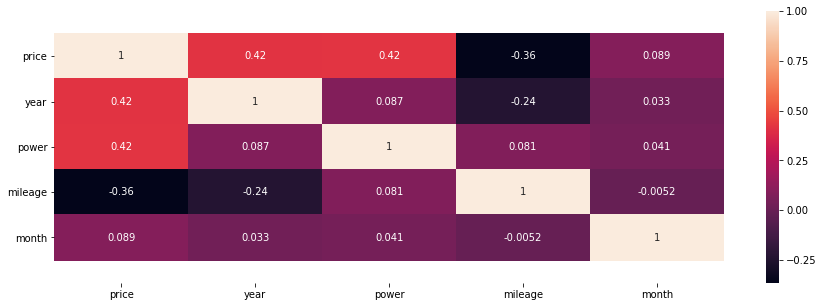

In [40]:
# Correlations
plt.figure(figsize=(15,5))
ax = sns.heatmap(car_data.corr(), annot=True, cmap='rocket')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

The correlations already look much better!

#### Converting the datecreated from date to number (‘unix’ epoch)

In [41]:
car_data['datecreated'] = (pd.to_datetime(car_data['datecreated']) - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")

In [42]:
car_data['datecreated'].head()

0    1458777600
2    1457913600
3    1458172800
4    1459382400
5    1459728000
Name: datecreated, dtype: int64

<a id="step2"></a>
## Step 2. Model training

[back to table of contents](#contents)

In [43]:
# Creating the preprocessing pipelines for both numeric and categorical data. 

numeric_features = ['year', 'power', 'mileage', 'month','datecreated']

categorical_features = ['type','gearbox', 'fuel', 'repaired']
ohe_transformer = OneHotEncoder(drop='first')

categorical_high_cardinality_features = ['model', 'brand']

all_categorical_features = categorical_features+categorical_high_cardinality_features


In [44]:
# Defining categorical features transformer
cat_transformer = ColumnTransformer(
     [('cat_features', ohe_transformer, categorical_features),
      ('high_car_features', TargetEncoder(), categorical_high_cardinality_features)]
)

In [45]:
# Defining numerical features transformer
numeric_transformer = ColumnTransformer(
    [('numeric', StandardScaler(), numeric_features)]
)

In [46]:
# Defining categorical + numerical features transformer
preprocessor = ColumnTransformer(
     [('cat_features', ohe_transformer, categorical_features),
      ('high_car_features', TargetEncoder(), categorical_high_cardinality_features),
      ('numeric', StandardScaler(), numeric_features)]
)

In [47]:
# Data set split to train and test sets

features_train, features_test, target_train, target_test = train_test_split(
    car_data.drop('price', axis=1), car_data.price, test_size=0.25, random_state=12345
)

categorical_index= [features_train.columns.get_loc(col) for col in all_categorical_features]

In [48]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235855 entries, 33222 to 242827
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   type         235855 non-null  object
 1   year         235855 non-null  int64 
 2   gearbox      235855 non-null  object
 3   power        235855 non-null  int64 
 4   model        235855 non-null  object
 5   mileage      235855 non-null  int64 
 6   month        235855 non-null  int64 
 7   fuel         235855 non-null  object
 8   brand        235855 non-null  object
 9   repaired     235855 non-null  object
 10  datecreated  235855 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 21.6+ MB


### Linear Regression

In [49]:
model = LinearRegression()
params = {}

pipeline = Pipeline([('preprocessing', preprocessor ), 
                     ('model', model)])

lr = GridSearchCV(pipeline,  param_grid=params, cv=5, scoring = 'neg_root_mean_squared_error')
lr.fit(features_train, target_train)

#cv_model_evaluation(lr)
print(abs(lr.best_score_), lr.best_params_)

2811.8317640238574 {}


### Decision Tree Regressor

In [50]:
# Decision tree

model = DecisionTreeRegressor(random_state=12345)

# Let's optimize the model by finding the best hyperparameters
params = {'model__max_depth': range(5, 25, 5), 'model__min_samples_split' : range(2, 14, 3)}

pipeline = Pipeline([('preprocessing', preprocessor ), 
                     ('model', model)])

dtr = GridSearchCV(pipeline,  param_grid=params, cv=5, scoring = 'neg_root_mean_squared_error')
dtr.fit(features_train, target_train)

#cv_model_evaluation(dtr)
print(abs(dtr.best_score_), dtr.best_params_)

1878.9241818280389 {'model__max_depth': 15, 'model__min_samples_split': 11}


### Random Forest Regressor

In [ ]:
# Random forest

model = RandomForestRegressor(random_state=12345)

# Let's optimize the model by finding the best hyperparameters
params = {'model__n_estimators': range(10, 70, 20), 'model__max_depth': range(5, 25, 5), 'model__min_samples_split' : range(3, 15, 3)}

pipeline = Pipeline([('preprocessing', preprocessor ), 
                     ('model', model)])

rfr = GridSearchCV(pipeline,  param_grid=params, cv=5, scoring = 'neg_root_mean_squared_error')
rfr.fit(features_train, target_train)

#cv_model_evaluation(rfr)
print(abs(rfr.best_score_), rfr.best_params_)

### LightGBM

In [ ]:
model = lgb.LGBMRegressor(categorical_feature=categorical_index, random_state=1234)

pipeline = Pipeline([('preprocessing', numeric_transformer), 
                     ('model', model)])
params = {
    'model__n_estimators': range(10, 70, 20),
    'model__colsample_bytree': np.arange(0.1, 0.9,0.2),
    'model__max_depth': range(5, 25, 5),
    'model__num_leaves': range(20, 70, 10),
    'model__reg_alpha': np.arange(1.1, 1.5, 0.4),
    'model__reg_lambda': np.arange(1.1, 1.3, 0.2),
    'model__min_split_gain': np.arange(0.2, 0.4,0.1),
    'model__subsample': np.arange(0.7, 0.9, 0.1),
    'model__subsample_freq': [20]
}

lgbmr = GridSearchCV(pipeline, param_grid=params, cv=5, scoring = 'neg_root_mean_squared_error')
lgbmr.fit(features_train, target_train)

#cv_model_evaluation(lgb)
print(abs(lgbmr.best_score_), lgbmr.best_params_)

# Predict the model
predict = lgbmr.predict(features_test)
 
# RMSE Computation
lightGBM_rmse = math.sqrt(mean_squared_error(target_test, predict))
print(f'RMSE: {lightGBM_rmse:.2f}')

###  CatBoostRegressor

In [54]:
# Preprocessing only numerical features
features_train_scaled = features_train.copy()
features_test_scaled = features_test.copy()

# Preprocessing only numerical features
numeric_transformer.fit(features_train)
features_train_scaled[numeric_features] = numeric_transformer.transform(features_train_scaled)
features_test_scaled[numeric_features] = numeric_transformer.transform(features_test_scaled)

In [ ]:
model = CatBoostRegressor(cat_features=all_categorical_features, random_seed=12345, verbose=10)

params = {'depth': range(4, 10, 2), 'learning_rate': np.arange(.05, .1, .1), 'iterations': range(10, 40, 10)}

cbr = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

cbr.fit(features_train_scaled, target_train)

#cv_model_evaluation(cbr)
print(abs(cbr.best_score_), cbr.best_params_) 

### XGBoost 

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', seed = 1234, verbose=10)
pipeline = Pipeline([('preprocessing', preprocessor ), ('model', model)])

params = {
    'model__n_estimators': range(10, 25, 25),
    'model__colsample_bytree': np.arange(0.1, 0.9,0.5),
    'model__max_depth': range(10, 25, 25),
    'model__num_leaves': range(50, 200, 150),
    'model__reg_alpha': np.arange(1.1, 1.5, 0.4),
    'model__reg_lambda': np.arange(1.1, 1.3, 0.2),
    'model__min_split_gain': np.arange(0.3, 0.4,0.1),
    'model__subsample': np.arange(0.7, 0.9, 0.2),
    'model__subsample_freq': [20]
}

xgbr = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_root_mean_squared_error')
xgbr.fit(features_train, target_train)

#cv_model_evaluation(xgb)
print(abs(xgbr.best_score_), xgbr.best_params_)  

# Predict the model
predict = xgbr.predict(features_test)
  
# RMSE Computation
XGBoost_rmse = math.sqrt(mean_squared_error(target_test, predict))

<a id="step3"></a>
## Step 3. Model analysis

[back to table of contents](#contents)

### Comparing the models: training the final model (with optimized hyperparameters) and predicting on test set

### Cat Boost Regressor

In [55]:
cbr = CatBoostRegressor(cat_features=all_categorical_features, depth=8, iterations=30, learning_rate=0.05 ,random_seed=12345, verbose=10)

#Model training
start = time.time()
cbr.fit(features_train_scaled, target_train)
stop = time.time()
cbr_fit_time = stop-start

#Prediction
start = time.time()
cbr_pred = cbr.predict(features_test_scaled)
stop = time.time()
cbr_predict_time = stop-start

cbr_rmse = math.sqrt(mean_squared_error(target_test, cbr_pred))
print(f'RMSE: {cbr_rmse:.2f}')
print(f'fit time={cbr_fit_time}\npredict time={cbr_predict_time}')

0:	learn: 4373.6749204	total: 292ms	remaining: 8.46s
10:	learn: 3255.0960392	total: 2.89s	remaining: 4.99s
20:	learn: 2662.7811487	total: 5.38s	remaining: 2.31s
29:	learn: 2354.3048016	total: 7.67s	remaining: 0us
RMSE: 2368.24
fit time=9.41160798072815
predict time=0.09391283988952637


In [56]:
# Encoding categorical features ['type','gearbox', 'fuel', 'repaired']

# One hot encoding categorical features
ohe_train_encoded = pd.get_dummies(features_train_scaled[categorical_features], drop_first=True)
ohe_test_encoded = pd.get_dummies(features_test_scaled[categorical_features], drop_first=True)

# We join back the OHE columns and drop the original ones
features_train_encoded = features_train_scaled.join(ohe_train_encoded).drop(categorical_features, axis=1)
features_test_encoded = features_test_scaled.join(ohe_test_encoded).drop(categorical_features, axis=1)

In [57]:
# Encoding high cardinality categorical features ['model','brand']
features_train_se = features_train_encoded.copy()
features_test_se = features_test_encoded.copy()

# Target encoding categorical features
t_encoder = TargetEncoder()
t_encoder.fit(features_train_encoded[categorical_high_cardinality_features],target_train)

features_train_se[categorical_high_cardinality_features] = pd.DataFrame(t_encoder.transform(features_train_encoded[categorical_high_cardinality_features]), columns=categorical_high_cardinality_features)
features_test_se[categorical_high_cardinality_features] = pd.DataFrame(t_encoder.transform(features_test_encoded[categorical_high_cardinality_features]), columns=categorical_high_cardinality_features)

### Linear Regression

In [58]:
lr = LinearRegression()

start = time.time()
lr.fit(features_train_se, target_train)
stop = time.time()
lr_fit_time = stop-start

start = time.time()
lr_pred = lr.predict(features_test_se)
stop = time.time()
lr_predict_time = stop-start

lr_rmse = math.sqrt(mean_squared_error(target_test, lr_pred))
print(f'RMSE: {lr_rmse:.2f}')
print(f'fit time={lr_fit_time}\npredict time={lr_predict_time}')

RMSE: 2817.84
fit time=0.365511417388916
predict time=0.013007164001464844


### Decision Tree

In [59]:
dtr = DecisionTreeRegressor(max_depth=15 , min_samples_split=11 , random_state=12345)

start = time.time()
dtr.fit(features_train_se, target_train)
stop = time.time()
dtr_fit_time = stop-start

start = time.time()
dtr_pred = dtr.predict(features_test_se)
stop = time.time()
dtr_predict_time = stop-start

dtr_rmse = math.sqrt(mean_squared_error(target_test, dtr_pred))
print(f'RMSE: {dtr_rmse:.2f}')
print(f'fit time={dtr_fit_time}\npredict time={dtr_predict_time}')

RMSE: 1837.58
fit time=1.0402240753173828
predict time=0.016822099685668945


### Random Forest

In [60]:
rfr = RandomForestRegressor(n_estimators=50 , max_depth=20 , min_samples_split=9 , random_state=12345)

start = time.time()
rfr.fit(features_train_se, target_train)
stop = time.time()
rfr_fit_time = stop-start

start = time.time()
rfr_pred = rfr.predict(features_test_se)
stop = time.time()
rfr_predict_time = stop-start

rfr_rmse = math.sqrt(mean_squared_error(target_test, rfr_pred))
print(f'RMSE: {rfr_rmse:.2f}')
print(f'fit time={rfr_fit_time}\npredict time={rfr_predict_time}')

RMSE: 1605.31
fit time=38.50609731674194
predict time=0.8866684436798096


### LightGBM

In [61]:
lgbmr = lgb.LGBMRegressor(n_estimators=50 ,colsample_bytree=0.7000000000000001 , max_depth=20 ,num_leaves=60 ,reg_alpha=1.1 ,reg_lambda=1.1 ,
                          min_split_gain=0.2 ,subsample=0.8999999999999999 ,subsample_freq=20 ,categorical_feature=categorical_index, random_state=1234)

start = time.time()
lgbmr.fit(features_train_se, target_train)
stop = time.time()
lgbmr_fit_time = stop-start

start = time.time()
lgbmr_pred = lgbmr.predict(features_test_se)
stop = time.time()
lgbmr_predict_time = stop-start

lgbmr_rmse = math.sqrt(mean_squared_error(target_test, lgbmr_pred))
print(f'RMSE: {lgbmr_rmse:.2f}')
print(f'fit time={lgbmr_fit_time}\npredict time={lgbmr_predict_time}')

RMSE: 2118.70
fit time=5.532863616943359
predict time=0.5099432468414307


### XGBoost

In [62]:
xgbr = xgb.XGBRegressor(n_estimators=10 ,colsample_bytree=0.6 , max_depth=10 ,num_leaves=50 ,reg_alpha=1.1 ,reg_lambda=1.1 ,
                        min_split_gain=0.3 ,subsample=0.8999999999999999 ,subsample_freq=20 ,objective ='reg:squarederror', seed = 1234, verbose=10)

start = time.time()
xgbr.fit(features_train_se, target_train)
stop = time.time()
xgbr_fit_time = stop-start

start = time.time()
xgbr_pred = xgbr.predict(features_test_se)
stop = time.time()
xgbr_predict_time = stop-start

xgbr_rmse = math.sqrt(mean_squared_error(target_test, xgbr_pred))
print(f'RMSE: {xgbr_rmse:.2f}')
print(f'fit time={xgbr_fit_time}\npredict time={xgbr_predict_time}')

RMSE: 3030.85
fit time=4.923832178115845
predict time=0.0849001407623291


In [63]:
data = [[lr_rmse,lr_fit_time,lr_predict_time],[xgbr_rmse,xgbr_fit_time,xgbr_predict_time],
        [lgbmr_rmse,lgbmr_fit_time,lgbmr_predict_time],[cbr_rmse,cbr_fit_time,cbr_predict_time],
        [rfr_rmse,rfr_fit_time,rfr_predict_time],[dtr_rmse,dtr_fit_time,dtr_predict_time]
       ]
columns=['rmse','fit time','predict time']
index = ('LinearRegression','XGBoost','LightGBM','CatBoost','RandomForest','DecisionTree')
scores = pd.DataFrame(data,columns=columns,index=index)
scores.sort_values(by='rmse')

,rmse,fit time,predict time
RandomForest,1605.313424,38.506097,0.886668
DecisionTree,1837.577574,1.040224,0.016822
LightGBM,2118.698753,5.532864,0.509943
CatBoost,2368.240973,9.411608,0.093913
LinearRegression,2817.838936,0.365511,0.013007
XGBoost,3030.845583,4.923832,0.084900


### Analysis Summary:

1. RandomForest model provides the best predictions in RMSE terms (1605), but - the worst training time by far (45 sec.).

2. XGBoost and DecisionTree preformed quite good in prediction, not far from RandomForest (RMSE 1708 and 1837) and are fast in training time (1.13-1.31 sec.) and fastest in prediction tiem (0.022 and 0.031)

3. LightGBM and CatBoost didn't perform so good in prediction (2122 and 2363 RMSE), but are better then LinearRegression.

4. LinearRgeression model (our sanity model) had the worst prediction, but is fine in terms of training and prediction time.

5. **The best models according to our analysis are XGBoost and DecisionTree**, which got good RMSE, and low training and prediction times.